In [21]:
##########################
# CS 430 Final Project
# Emily Warman, Rachael Affenit
# Local Approach
##########################

import os
import copy
import itertools
import matplotlib.pyplot as plt
import math

In [22]:
%matplotlib inline

def plot(points,lines):
    plt.scatter(*zip(*points))
    axes = plt.gca()
    #plot lines drawn
    for line in lines:
        if line[1]==0:
            plt.plot([line[0], line[0]],[0,len(points)], color='b', linestyle='-',linewidth=2)
        else:
            plt.plot([0,len(points)],[line[0],line[0]], color='b', linestyle='-', linewidth=2)
    plt.show()
    
#get all permutations of a list of possible lines
def get_combinations(lines):
    return itertools.combinations(lines,2)

#make a list of possible lines (range function that takes floats)
def drange(x, y, jump):
    r=[]
    while x < y:
        r.append(float(x))
        x += jump
    return r

#create lists of possible points (min x to max x, min y to max y)
#O(nlogn)
def get_all_possible(points):
    x_sort = sorted(points, key=lambda x: x[0])
    y_sort = sorted(points, key=lambda x: x[1])
    x_min = x_sort[0][0]
    x_max = x_sort[-1][0]
    y_min = y_sort[0][1]
    y_max = y_sort[-1][1]
    x = [0]*len(x_sort)
    y = [1]*len(y_sort)
    
    return (list(zip(drange(x_min+.5,x_max+.5,1),x))), (list(zip(drange(y_min+.5,y_max+.5,1),y)))
    #return drange(x_min+.5,x_max+.5,1)
    
def get_possible(points):
    x_sort = sorted(points, key=lambda x: x[0])
    y_sort = sorted(points, key=lambda x: x[1])
    x_min = x_sort[0][0]
    x_max = x_sort[-1][0]
    y_min = y_sort[0][1]
    y_max = y_sort[-1][1]
    x = [0]*len(x_sort)
    y = [1]*len(y_sort)
    
    return (list(zip(drange(x_min+.5,x_max+.5,1),x))) + (list(zip(drange(y_min+.5,y_max+.5,1),y)))
    #return drange(x_min+.5,x_max+.5,1)

def get_x_y_lines(lines):
    x_lines=[]
    y_lines=[]
    for line in lines:
        if line[1] == 0:
            x_lines.append(line[0])
        else:
            y_lines.append(line[0])
    return x_lines,y_lines

def collisions(points,lines):
    n=len(points)
    #if pair[0] not in lines:
       # print(pair[0],lines)
    #else:
     #   lines.remove(pair[0])
    #if pair[1] not in lines:
    #    print(pair[1],lines)
    #else:
    #    lines.remove(pair[1])
    #if possible_line in lines:
    #    print(possible_line,lines)
    #else:
    #    lines.append(possible_line)
    x_lines,y_lines=get_x_y_lines(lines)
    x_interval = [0]
    x_interval.extend(x_lines)
    x_interval.append(len(points)+1)
    y_interval = [0]
    y_interval.extend(y_lines)
    y_interval.append(len(points)+1)
    boxes=[]
    for point in points:
        #find box of point
        #print(point)
        x_box=0
        while point[0]>=x_interval[x_box] and x_box<len(x_interval):
            x_box+=1
        y_box=0
        while point[1]>=y_interval[y_box] and y_box<len(y_interval):
            y_box+=1
        box = (x_box-1,y_box-1)
        if box in boxes:
            return True
        else:
            boxes.append(box)
    return False

def generate_possible_lines(points,lines_drawn):
    all_possible = get_possible(points)
    for line in lines_drawn:
        if line in all_possible:
            all_possible.remove(line)
    return(all_possible)

In [23]:
def solution(points,lines_drawn):
    print(len(lines_drawn))
    if len(lines_drawn)==math.ceil(math.sqrt(len(points))*2)-2:
        return(lines_drawn)
    
    x = get_combinations(lines_drawn)
    possible_lines = generate_possible_lines(points,lines_drawn)
    
    for pair in x:
        lines_drawn.remove(pair[0])
        lines_drawn.remove(pair[1])
        all_collisions=True
        for possible_line in possible_lines:
            lines_drawn.append(possible_line)
            if collisions(points,lines_drawn)==False:
                all_collisions=False
                solution(points,lines_drawn)
                #print("CALL TO SOLUTION:",lines_drawn,possible_lines)
                #solution(points,lines_drawn)
                #sol_stack.append(copy.copy(lines_drawn))
            lines_drawn.remove(possible_line)
        lines_drawn.append(pair[0])
        lines_drawn.append(pair[1])
        if all_collisions:
            return(lines_drawn)
    #print(sol_stack)
    return(lines_drawn)

27
26


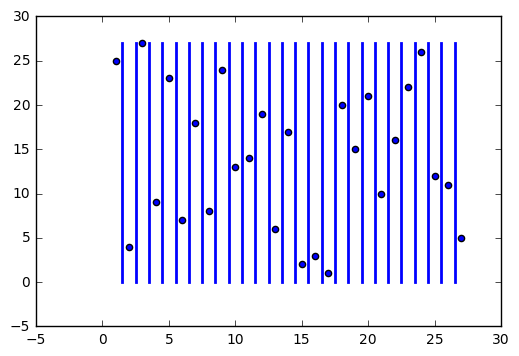

In [27]:
##########################
# Main Program: Import Data
##########################
#for filename in os.listdir(os.getcwd()+'/input'):
    
def read_file(filename):
    points = []
    with open('input/'+filename, 'r') as f:
        inpt = f.readlines()
        for point in inpt[1:]:
            point = point.split(' ')
            points.append(((int(point[0])),(int(point[1]))))
    return points

points = read_file('instance04.txt')
all_x_lines,all_y_lines=get_all_possible(points)
print(len(points))
ld = solution(points,all_x_lines)
#print(ld)
plot(points,ld)

In [20]:
print (len(ld))
for i in range (0,len(ld)):
    if (vh[i] == 0):
        print ("v ", S[i])
    elif (vh[i] == 1):
        print ("h ", S[i])

2
2
2
2


In [13]:
possible_lines = generate_possible_lines(points,all_x_lines)
print(possible_lines)

[(1.5, 1), (2.5, 1), (3.5, 1), (4.5, 1), (5.5, 1), (6.5, 1), (7.5, 1), (8.5, 1), (9.5, 1), (10.5, 1), (11.5, 1), (12.5, 1), (13.5, 1), (14.5, 1), (15.5, 1), (16.5, 1), (17.5, 1), (18.5, 1), (19.5, 1), (20.5, 1), (21.5, 1), (22.5, 1), (23.5, 1), (24.5, 1), (25.5, 1), (26.5, 1), (27.5, 1), (28.5, 1), (29.5, 1), (30.5, 1), (31.5, 1), (32.5, 1), (33.5, 1), (34.5, 1), (35.5, 1), (36.5, 1), (37.5, 1), (38.5, 1), (39.5, 1), (40.5, 1), (41.5, 1), (42.5, 1), (43.5, 1), (44.5, 1), (45.5, 1), (46.5, 1), (47.5, 1), (48.5, 1), (49.5, 1), (50.5, 1), (51.5, 1), (52.5, 1), (53.5, 1), (54.5, 1), (55.5, 1), (56.5, 1), (57.5, 1), (58.5, 1), (59.5, 1), (60.5, 1), (61.5, 1), (62.5, 1), (63.5, 1), (64.5, 1), (65.5, 1), (66.5, 1), (67.5, 1), (68.5, 1), (69.5, 1), (70.5, 1), (71.5, 1), (72.5, 1), (73.5, 1), (74.5, 1), (75.5, 1), (76.5, 1), (77.5, 1), (78.5, 1), (79.5, 1), (80.5, 1), (81.5, 1), (82.5, 1), (83.5, 1), (84.5, 1), (85.5, 1), (86.5, 1), (87.5, 1), (88.5, 1), (89.5, 1), (90.5, 1), (91.5, 1), (92.5, 

In [8]:
math.ceil(math.sqrt(len(points))*2)-2

5